# Imports

Necessary lib imports

In [285]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Import the relevant CSV file

In [286]:
df = pd.read_csv("LoanStats.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,112) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [287]:
def check_types(df, cat):
  temp = list()
  for x in df[cat]:
    if x not in temp:
      temp.append(x)
      print(x, end=" ")
  print()

def check_null(df, cat):
  df[cat].isnull().values.any()

def show_10(df, cat):
  df[cat].show(10)

# Data Exploration and Cleaning

After having a glance at the data, we observed that there were three types of application - Individual, Joint and Direct Pay. Due to the overwhelming majority of the data belonging to individual applications, we decided to use only them.

In [288]:
print("No. of applications: %d" % (df.shape[0]))
print("No. of Individual applications: %d" % (df[df["application_type"] == "INDIVIDUAL"].shape[0]))
print("No. of Joint applications: %d" % (df[df["application_type"] == "JOINT"].shape[0]))
print("No. of Direct Pay applications: %d\n" % (df[(df["application_type"] != "JOINT") & (df["application_type"] != "INDIVIDUAL")].shape[0]))
df = df[df["application_type"] == "INDIVIDUAL"]
df["application_type"].head(5)

No. of applications: 96783
No. of Individual applications: 92346
No. of Joint applications: 4407
No. of Direct Pay applications: 30



0    INDIVIDUAL
1    INDIVIDUAL
2    INDIVIDUAL
3    INDIVIDUAL
4    INDIVIDUAL
Name: application_type, dtype: object

We now drop the columns which were relavant to joint applications as well as those that were either missing information, or simply lack the amount of data we needed

In [289]:
df = df.drop(["id",
              "member_id",
              "url",
              "desc",
              "annual_inc_joint",
              "dti_joint",
              "verification_status_joint",
              "mths_since_recent_bc_dlq",
              "acc_now_delinq",
              "revol_bal_joint",
              "sec_app_earliest_cr_line",
              "sec_app_inq_last_6mths",
              "sec_app_mort_acc",
              "sec_app_open_acc",
              "sec_app_revol_util",
              "sec_app_open_il_6m",
              "sec_app_num_rev_accts",
              "sec_app_chargeoff_within_12_mths",
              "sec_app_collections_12_mths_ex_med",
              "sec_app_mths_since_last_major_derog"
              ],axis = 1)

df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,3600.0,3600.0,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,...,0.0,6.0,100.0,0.0,1.0,0.0,93599.0,36506.0,9000.0,55699.0
1,15000.0,15000.0,15000.0,60 months,14.99%,356.78,C,C4,Senior Superintendent,10+ years,...,0.0,0.0,100.0,66.7,0.0,0.0,148572.0,69364.0,60300.0,30224.0
2,8400.0,8400.0,8400.0,36 months,11.39%,276.56,B,B3,IT Tech,8 years,...,0.0,5.0,100.0,14.3,0.0,0.0,205671.0,51591.0,36100.0,36876.0
3,4000.0,4000.0,4000.0,36 months,10.49%,130.00,B,B2,Dental hygienist,2 years,...,0.0,1.0,87.5,100.0,0.0,0.0,152852.0,136208.0,2500.0,139652.0
4,6000.0,6000.0,6000.0,36 months,7.24%,185.93,A,A3,Program Manager,3 years,...,0.0,3.0,59.1,20.0,0.0,0.0,72865.0,60622.0,23200.0,49665.0
5,20000.0,20000.0,20000.0,36 months,15.99%,703.05,C,C5,Business development,1 year,...,0.0,5.0,95.8,20.0,0.0,0.0,91877.0,39953.0,35900.0,46377.0
6,5000.0,5000.0,5000.0,36 months,14.99%,173.31,C,C4,Lead Supervisor,10+ years,...,0.0,0.0,94.4,75.0,0.0,0.0,52113.0,36168.0,11400.0,40713.0
7,20000.0,20000.0,20000.0,36 months,8.24%,628.95,B,B1,IT Lead Business Analyst,10+ years,...,0.0,2.0,100.0,75.0,1.0,0.0,301225.0,32374.0,16700.0,38772.0
8,12000.0,12000.0,12000.0,36 months,7.99%,375.99,A,A5,registerd nurse,9 years,...,0.0,11.0,100.0,33.3,0.0,0.0,601250.0,154720.0,48000.0,148041.0
9,9900.0,9900.0,9900.0,36 months,5.32%,298.14,A,A1,Radtech,10+ years,...,0.0,0.0,90.5,0.0,0.0,0.0,184966.0,43218.0,13200.0,48908.0


In [290]:
columns = ["annual_inc",
           "avg_cur_bal",
           "delinq_2yrs",
           "delinq_amnt",
           "dti",
           "emp_length",
           "int_rate",
           "loan_amnt",
           "max_bal_bc",
           "num_tl_30dpd",
           "pub_rec",
           "pub_rec_bankruptcies",
           "tot_cur_bal",
           "revol_bal",
           "revol_util",
           "grade"
           ]
           
rel_data = df[columns]
rel_data.head(10)

,annual_inc,avg_cur_bal,delinq_2yrs,delinq_amnt,dti,emp_length,int_rate,loan_amnt,max_bal_bc,num_tl_30dpd,pub_rec,pub_rec_bankruptcies,tot_cur_bal,revol_bal,revol_util,grade
0,120000.0,2147.0,0.0,0.0,18.90,10+ years,7.49%,3600.0,1020.0,0.0,1.0,1.0,36506.0,5658.0,14.90%,A
1,125000.0,8220.0,0.0,0.0,17.25,10+ years,14.99%,15000.0,15199.0,0.0,0.0,0.0,90423.0,53167.0,75.30%,C
2,50000.0,12389.0,0.0,0.0,15.63,8 years,11.39%,8400.0,5338.0,0.0,0.0,0.0,161061.0,12831.0,30.30%,B
3,50000.0,13621.0,1.0,0.0,33.61,2 years,10.49%,4000.0,2461.0,0.0,1.0,0.0,136208.0,4388.0,33.20%,B
4,125000.0,3789.0,0.0,0.0,9.25,3 years,7.24%,6000.0,6129.0,0.0,0.0,0.0,60622.0,9571.0,41.30%,A
5,77000.0,3073.0,1.0,0.0,29.02,1 year,15.99%,20000.0,5701.0,0.0,0.0,0.0,39953.0,11843.0,26%,C
6,68000.0,6028.0,0.0,0.0,22.50,10+ years,14.99%,5000.0,4261.0,0.0,0.0,0.0,36168.0,10276.0,90.10%,C
7,100000.0,26483.0,0.0,0.0,17.44,10+ years,8.24%,20000.0,5775.0,0.0,1.0,1.0,264832.0,16206.0,60%,B
8,100000.0,42743.0,0.0,0.0,28.82,9 years,7.99%,12000.0,5827.0,0.0,0.0,0.0,555654.0,25423.0,52.10%,A
9,53000.0,14612.0,1.0,0.0,19.47,10+ years,5.32%,9900.0,2756.0,0.0,0.0,0.0,146116.0,6585.0,34.50%,A


**annual_inc** - The self-reported annual income provided by the borrower during registration.

Are there any NaN data in annual_inc: False
Max annual income: 61000000
Min annual income: 3400


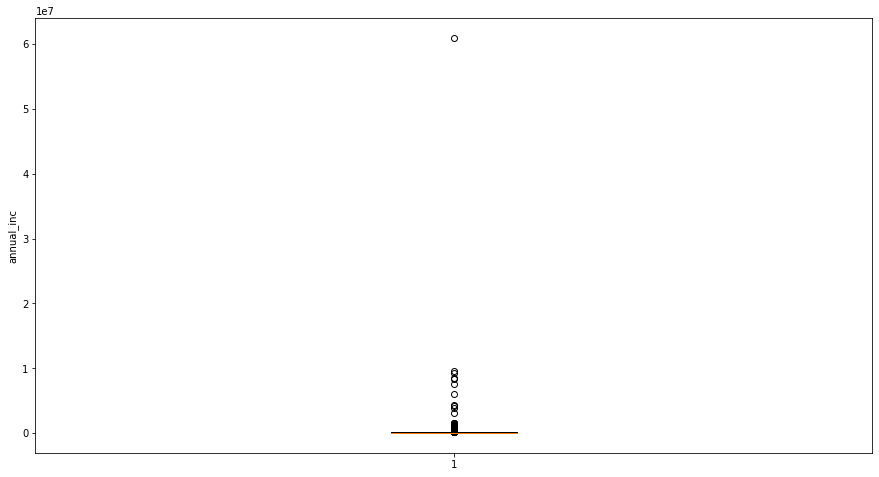

In [291]:
print("Are there any NaN data in annual_inc:", rel_data["annual_inc"].isnull().values.any())
plt.figure(figsize=(15,8))
plt.boxplot([rel_data["annual_inc"]])
plt.ylabel("annual_inc")
print("Max annual income: %.2d" % max(rel_data["annual_inc"]))
print("Min annual income: %.2d" % min(rel_data["annual_inc"]))
# remove extreme outlier
# rel_data = rel_data[rel_data["annual_inc"] < max(rel_data["annual_inc"])]

Max annual income: 61000000


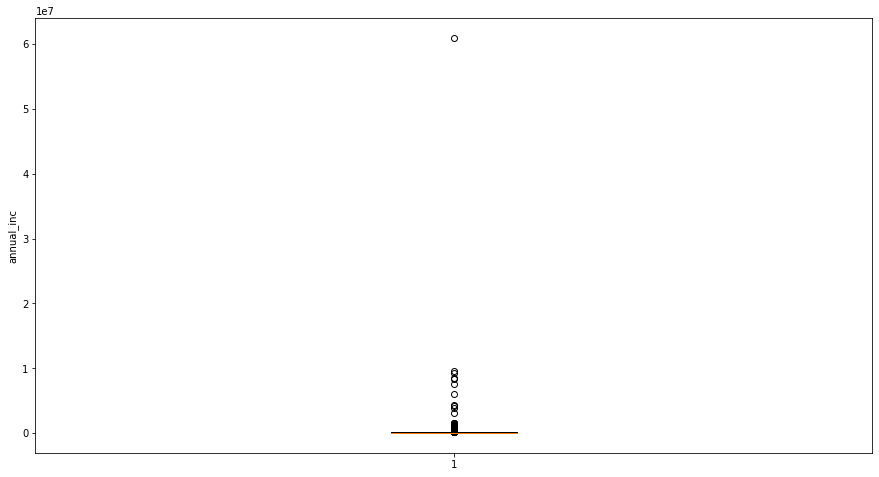

In [292]:
plt.figure(figsize=(15,8))
plt.boxplot([rel_data["annual_inc"]])
plt.ylabel("annual_inc")
print("Max annual income: %.2d" % max(rel_data["annual_inc"]))

**avg_cur_bal** - Average current balance of all accounts

Are there any NaN data in avg_cur_bal: False
Max annual income: 710392
Min annual income: 00


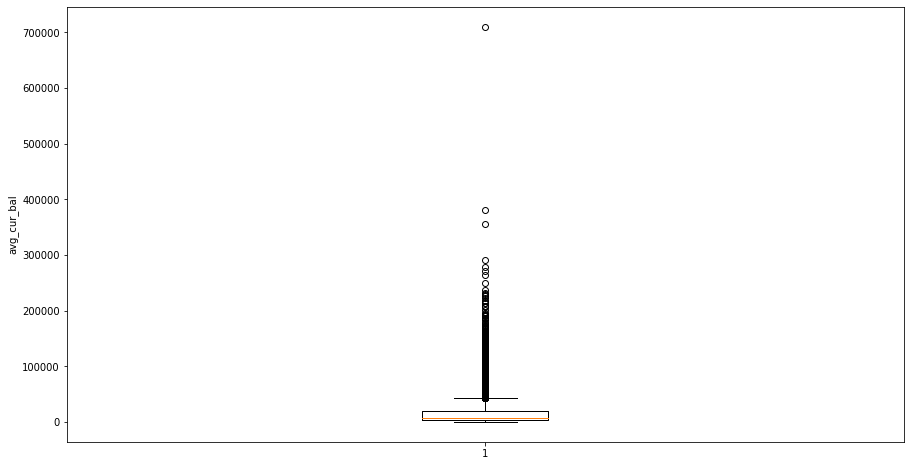

In [293]:
print("Are there any NaN data in avg_cur_bal:", rel_data["avg_cur_bal"].isnull().values.any())
plt.figure(figsize=(15,8))
plt.boxplot([rel_data["avg_cur_bal"]])
plt.ylabel("avg_cur_bal")
print("Max annual income: %.2d" % max(rel_data["avg_cur_bal"]))
print("Min annual income: %.2d" % min(rel_data["avg_cur_bal"]))

**delinq_2yrs** - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [294]:
print("Are there any NaN data in delinq_2yrs:", rel_data["delinq_2yrs"].isnull().values.any())
print("Max delinq_2yrs: %d" % max(rel_data["delinq_2yrs"]))
print("Min delinq_2yrs: %d" % min(rel_data["delinq_2yrs"]))

Are there any NaN data in delinq_2yrs: False
Max delinq_2yrs: 21
Min delinq_2yrs: 0


**delinq_amnt** - The past-due amount owed for the accounts on which the borrower is now delinquent. **bold text**

Max delinq_amnt: 65000
Min delinq_amnt: 0
Mean delinq_amnt: 16


Text(0, 0.5, 'delinq_amnt')

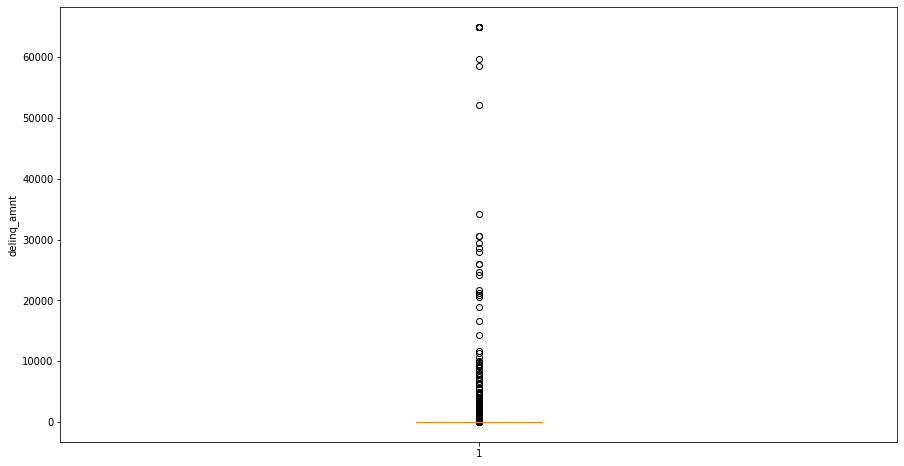

In [295]:
print("Max delinq_amnt: %d" % max(rel_data["delinq_amnt"]))
print("Min delinq_amnt: %d" % min(rel_data["delinq_amnt"]))
print("Mean delinq_amnt: %d" % np.mean(rel_data["delinq_amnt"]))
plt.figure(figsize=(15,8))
plt.boxplot([rel_data["delinq_amnt"]])
plt.ylabel("delinq_amnt")

**dti** - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

Are there any NaN data in dti: False
Max dti: 34
Min dti: 00


Text(0, 0.5, 'dti')

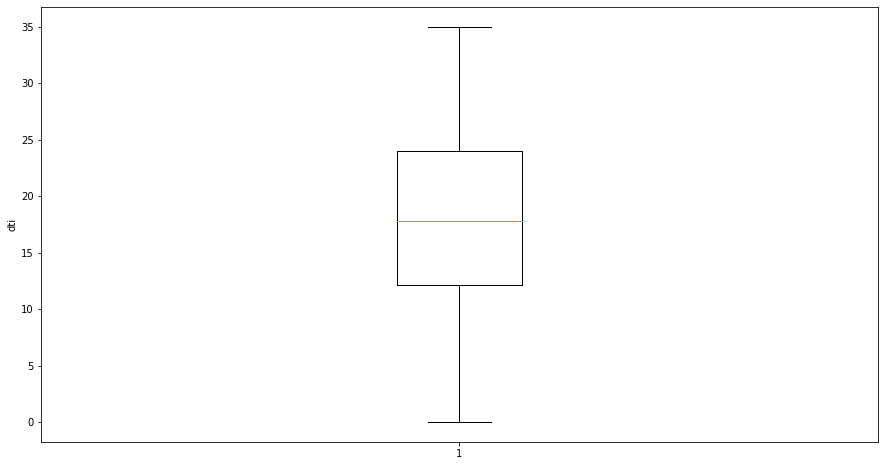

In [296]:
print("Are there any NaN data in dti:", rel_data["dti"].isnull().values.any())
print("Max dti: %.2d" % max(rel_data["dti"]))
print("Min dti: %.2d" % min(rel_data["dti"]))
plt.figure(figsize=(15,8))
plt.boxplot([rel_data["dti"]])
plt.ylabel("dti")

**emp_length** - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [297]:
print("Are there any NaN data in emp_length:", rel_data["emp_length"].isnull().values.any())

# Remove all rows with missing data
rel_data = rel_data.dropna()

check_types(rel_data, "emp_length")
print("Are there any NaN data in emp_length:", rel_data["emp_length"].isnull().values.any())
print(rel_data.shape)

Are there any NaN data in emp_length: True
10+ years 8 years 2 years 3 years 1 year 9 years 4 years 6 years 5 years < 1 year 7 years 
Are there any NaN data in emp_length: False
(85998, 16)


**int_rate** - Interest Rate on the loan

In [298]:
rel_data["int_rate"] = rel_data["int_rate"].str.replace('%', '').astype(float)/100
print("Max int_rate: %.4f" % max(rel_data["int_rate"]))
print("Min int_rate: %.4f" % min(rel_data["int_rate"]))
print("Mean int_rate: %.4f" % np.mean(rel_data["int_rate"]))
rel_data.head(10)

Max int_rate: 0.3099
Min int_rate: 0.0532
Mean int_rate: 0.1333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc,avg_cur_bal,delinq_2yrs,delinq_amnt,dti,emp_length,int_rate,loan_amnt,max_bal_bc,num_tl_30dpd,pub_rec,pub_rec_bankruptcies,tot_cur_bal,revol_bal,revol_util,grade
0,120000.0,2147.0,0.0,0.0,18.90,10+ years,0.0749,3600.0,1020.0,0.0,1.0,1.0,36506.0,5658.0,14.90%,A
1,125000.0,8220.0,0.0,0.0,17.25,10+ years,0.1499,15000.0,15199.0,0.0,0.0,0.0,90423.0,53167.0,75.30%,C
2,50000.0,12389.0,0.0,0.0,15.63,8 years,0.1139,8400.0,5338.0,0.0,0.0,0.0,161061.0,12831.0,30.30%,B
3,50000.0,13621.0,1.0,0.0,33.61,2 years,0.1049,4000.0,2461.0,0.0,1.0,0.0,136208.0,4388.0,33.20%,B
4,125000.0,3789.0,0.0,0.0,9.25,3 years,0.0724,6000.0,6129.0,0.0,0.0,0.0,60622.0,9571.0,41.30%,A
5,77000.0,3073.0,1.0,0.0,29.02,1 year,0.1599,20000.0,5701.0,0.0,0.0,0.0,39953.0,11843.0,26%,C
6,68000.0,6028.0,0.0,0.0,22.50,10+ years,0.1499,5000.0,4261.0,0.0,0.0,0.0,36168.0,10276.0,90.10%,C
7,100000.0,26483.0,0.0,0.0,17.44,10+ years,0.0824,20000.0,5775.0,0.0,1.0,1.0,264832.0,16206.0,60%,B
8,100000.0,42743.0,0.0,0.0,28.82,9 years,0.0799,12000.0,5827.0,0.0,0.0,0.0,555654.0,25423.0,52.10%,A
9,53000.0,14612.0,1.0,0.0,19.47,10+ years,0.0532,9900.0,2756.0,0.0,0.0,0.0,146116.0,6585.0,34.50%,A


**loan_amnt** - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [299]:
print("Max loan_amnt: %.2f" % max(rel_data["loan_amnt"]))
print("Min loan_amnt: %.2f" % min(rel_data["loan_amnt"]))
print("Mean loan_amnt: %.2f" % np.mean(rel_data["loan_amnt"]))

Max loan_amnt: 40000.00
Min loan_amnt: 1000.00
Mean loan_amnt: 14830.92


**max_bal_bc** - Maximum current balance owed on all revolving accounts

In [300]:
print("Max max_bal_bc: %2f" % max(rel_data["max_bal_bc"]))
print("Min max_bal_bc: %2f" % min(rel_data["max_bal_bc"]))
print("Mean max_bal_bc: %.2f" % np.mean(rel_data["max_bal_bc"]))

Max max_bal_bc: 301210.000000
Min max_bal_bc: 0.000000
Mean max_bal_bc: 6104.18


**num_tl_30dpd** - Number of accounts currently 30 days past due (updated in past 2 months)

In [301]:
print("Max num_tl_30dpd: %.2f" % max(rel_data["num_tl_30dpd"]))
print("Min num_tl_30dpd: %.2f" % min(rel_data["num_tl_30dpd"]))
print("Mean num_tl_30dpd: %.2f" % np.mean(rel_data["num_tl_30dpd"]))

Max num_tl_30dpd: 3.00
Min num_tl_30dpd: 0.00
Mean num_tl_30dpd: 0.00


**pub_rec** - Number of derogatory public records

In [302]:
print("Max pub_rec: %d" % max(rel_data["pub_rec"]))
print("Min pub_rec: %d" % min(rel_data["pub_rec"]))
print("Mean pub_rec: %d" % np.mean(rel_data["pub_rec"]))
print(rel_data["pub_rec"].tolist())

Max pub_rec: 61
Min pub_rec: 0
Mean pub_rec: 0
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

**pub_rec_bankruptcies** - Number of public record bankruptcies

In [303]:
print("Max pub_rec_bankruptcies: %d" % max(rel_data["pub_rec_bankruptcies"]))
print("Min pub_rec_bankruptcies: %d" % min(rel_data["pub_rec_bankruptcies"]))
print("Mean pub_rec_bankruptcies: %d" % np.mean(rel_data["pub_rec_bankruptcies"]))

Max pub_rec_bankruptcies: 7
Min pub_rec_bankruptcies: 0
Mean pub_rec_bankruptcies: 0


**tot_cur_bal** - Total current balance of all accounts

In [304]:
print("Max tot_cur_bal: %d" % max(rel_data["tot_cur_bal"]))
print("Min tot_cur_bal: %d" % min(rel_data["tot_cur_bal"]))
print("Mean tot_cur_bal: %d" % np.mean(rel_data["tot_cur_bal"]))

Max tot_cur_bal: 3777206
Min tot_cur_bal: 0
Mean tot_cur_bal: 151441


**revol_bal** - Total credit revolving balance

Max revol_bal: 1087664
Min revol_bal: 0
Mean revol_bal: 17427


Text(0, 0.5, 'revol_bal')

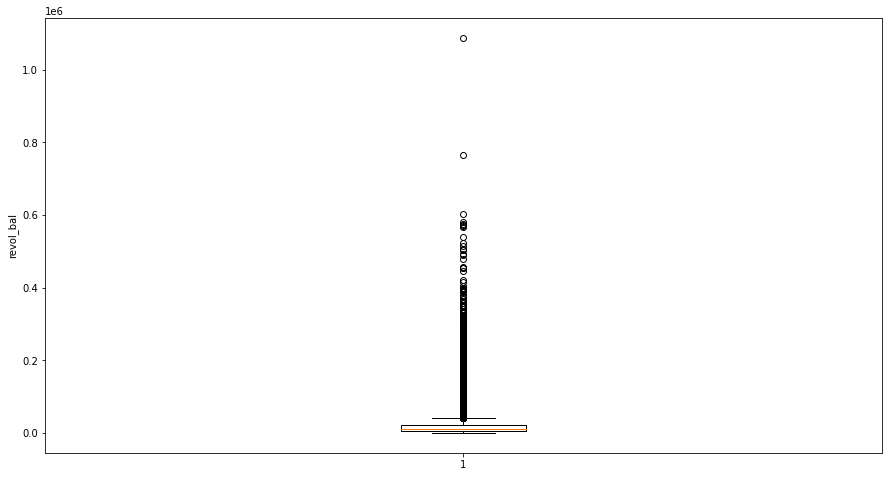

In [305]:
print("Max revol_bal: %d" % max(rel_data["revol_bal"]))
print("Min revol_bal: %d" % min(rel_data["revol_bal"]))
print("Mean revol_bal: %d" % np.mean(rel_data["revol_bal"]))
plt.figure(figsize=(15,8))
plt.boxplot([rel_data["revol_bal"]])
plt.ylabel("revol_bal")

**revol_util** - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit

In [306]:
rel_data["revol_util"] = rel_data["revol_util"].str.replace('%', '').astype(float)/100
print("Max revol_util: %.4f" % max(rel_data["revol_util"]))
print("Min revol_util: %.4f" % min(rel_data["revol_util"]))
rel_data.head(10)

Max revol_util: 1.7320
Min revol_util: 0.0000


,annual_inc,avg_cur_bal,delinq_2yrs,delinq_amnt,dti,emp_length,int_rate,loan_amnt,max_bal_bc,num_tl_30dpd,pub_rec,pub_rec_bankruptcies,tot_cur_bal,revol_bal,revol_util,grade
0,120000.0,2147.0,0.0,0.0,18.90,10+ years,0.0749,3600.0,1020.0,0.0,1.0,1.0,36506.0,5658.0,0.149,A
1,125000.0,8220.0,0.0,0.0,17.25,10+ years,0.1499,15000.0,15199.0,0.0,0.0,0.0,90423.0,53167.0,0.753,C
2,50000.0,12389.0,0.0,0.0,15.63,8 years,0.1139,8400.0,5338.0,0.0,0.0,0.0,161061.0,12831.0,0.303,B
3,50000.0,13621.0,1.0,0.0,33.61,2 years,0.1049,4000.0,2461.0,0.0,1.0,0.0,136208.0,4388.0,0.332,B
4,125000.0,3789.0,0.0,0.0,9.25,3 years,0.0724,6000.0,6129.0,0.0,0.0,0.0,60622.0,9571.0,0.413,A
5,77000.0,3073.0,1.0,0.0,29.02,1 year,0.1599,20000.0,5701.0,0.0,0.0,0.0,39953.0,11843.0,0.260,C
6,68000.0,6028.0,0.0,0.0,22.50,10+ years,0.1499,5000.0,4261.0,0.0,0.0,0.0,36168.0,10276.0,0.901,C
7,100000.0,26483.0,0.0,0.0,17.44,10+ years,0.0824,20000.0,5775.0,0.0,1.0,1.0,264832.0,16206.0,0.600,B
8,100000.0,42743.0,0.0,0.0,28.82,9 years,0.0799,12000.0,5827.0,0.0,0.0,0.0,555654.0,25423.0,0.521,A
9,53000.0,14612.0,1.0,0.0,19.47,10+ years,0.0532,9900.0,2756.0,0.0,0.0,0.0,146116.0,6585.0,0.345,A


# Categorising

Categorising emp_length

In [307]:
check_types(rel_data, "emp_length")
rel_data["emp_length"].loc[(rel_data["emp_length"]) == "10+ years"] = 10
rel_data["emp_length"].loc[(rel_data["emp_length"]) == "1 year"] = 1
rel_data["emp_length"].loc[(rel_data["emp_length"]) == "< 1 year"] = 0

for i in range(1, 10):
  rel_data["emp_length"].loc[(rel_data["emp_length"]) == str(i) + " years"] = i
rel_data.head(10)

10+ years 8 years 2 years 3 years 1 year 9 years 4 years 6 years 5 years < 1 year 7 years 


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,annual_inc,avg_cur_bal,delinq_2yrs,delinq_amnt,dti,emp_length,int_rate,loan_amnt,max_bal_bc,num_tl_30dpd,pub_rec,pub_rec_bankruptcies,tot_cur_bal,revol_bal,revol_util,grade
0,120000.0,2147.0,0.0,0.0,18.90,10,0.0749,3600.0,1020.0,0.0,1.0,1.0,36506.0,5658.0,0.149,A
1,125000.0,8220.0,0.0,0.0,17.25,10,0.1499,15000.0,15199.0,0.0,0.0,0.0,90423.0,53167.0,0.753,C
2,50000.0,12389.0,0.0,0.0,15.63,8,0.1139,8400.0,5338.0,0.0,0.0,0.0,161061.0,12831.0,0.303,B
3,50000.0,13621.0,1.0,0.0,33.61,2,0.1049,4000.0,2461.0,0.0,1.0,0.0,136208.0,4388.0,0.332,B
4,125000.0,3789.0,0.0,0.0,9.25,3,0.0724,6000.0,6129.0,0.0,0.0,0.0,60622.0,9571.0,0.413,A
5,77000.0,3073.0,1.0,0.0,29.02,1,0.1599,20000.0,5701.0,0.0,0.0,0.0,39953.0,11843.0,0.260,C
6,68000.0,6028.0,0.0,0.0,22.50,10,0.1499,5000.0,4261.0,0.0,0.0,0.0,36168.0,10276.0,0.901,C
7,100000.0,26483.0,0.0,0.0,17.44,10,0.0824,20000.0,5775.0,0.0,1.0,1.0,264832.0,16206.0,0.600,B
8,100000.0,42743.0,0.0,0.0,28.82,9,0.0799,12000.0,5827.0,0.0,0.0,0.0,555654.0,25423.0,0.521,A
9,53000.0,14612.0,1.0,0.0,19.47,10,0.0532,9900.0,2756.0,0.0,0.0,0.0,146116.0,6585.0,0.345,A


In [308]:
rel_data.to_csv(r"Cleaned_LoanStats.csv", index=True)

# Split the Dataset

In [309]:
# split dataset to training and testing
def split_data(data, testsize):

  # Separate target value
  X = pd.DataFrame(data.values[:, :data.shape[1]-1], columns = data.columns[:-1])
  Y = pd.DataFrame(data.values[:, data.shape[1]-1], columns = [data.columns[-1]])

  # Splitting dataset to train and test
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = testsize)

  return X, Y, X_train, X_test, y_train, y_test

# Training the Model

Will be using Gini and Entropy to see which is better
There are many variables to be used as hyperparameter selection for improvements in accuracy in both training and testing

- Hyperparameter
  - criterion: can change to entropy
  - max_depth: use different values to train the data
  - min_sample_split: use different values to train the data

In [310]:
# Train using
def DecisionTree(X_train, y_train, crite, maxdepth):

  # Decision Tree Classifier Gini
  decisionTreeModel = DecisionTreeClassifier(criterion=crite, max_depth=maxdepth)

  # Train
  decisionTreeModel.fit(X_train, y_train)

  return decisionTreeModel

# Predict the Model

In [311]:
# Predict the model
def predict(X_test, decisionTreeModel):

  y_pred = decisionTreeModel.predict(X_test)
  
  return y_pred

# Accuracy of Model

In [312]:
def accuracy_model(y_test, y_pred):

  print("Accuracy: ", accuracy_score(y_test,y_pred)*100)

  return accuracy_score(y_test,y_pred)*100

# Removal of int_rate

int_rate significantly contributing the the tree splitting, used for **Experiment 2**

In [313]:
columns = ["annual_inc",
           "avg_cur_bal",
           "delinq_2yrs",
           "delinq_amnt",
           "dti",
           "emp_length",
           "loan_amnt",
           "max_bal_bc",
           "num_tl_30dpd",
           "pub_rec",
           "pub_rec_bankruptcies",
           "tot_cur_bal",
           "revol_bal",
           "revol_util",
           "grade"
           ]

rel_data_exclude_int = rel_data[columns]

# The Experiment

## Hyperparameter selection
- Comparing using Gini or Entropy as the criterion
- varying max_depth parameter to see which gives the best output

++++++++++++++
Experiment 1
++++++++++++++

################################################
Decide to use Gini or Entropy for the criterion
################################################

Decision Tree with Gini result
Accuracy:  99.44129526381339

Decision Tree with Entropy result
Accuracy:  97.47535297335676
_________________________________________________________________________
Therefore we will be using gini as the accuracy is higher during testing
_________________________________________________________________________

################################################
Hyperparameter selection for Max Depth
################################################

Accuracy:  92.44817431587768
Accuracy:  97.64412836241314
Accuracy:  95.45470417748187
Accuracy:  95.0473153073458
Accuracy:  96.93410776017599
Accuracy:  96.93410776017599
Accuracy:  95.45470417748187
Accuracy:  95.45470417748187
Accuracy:  95.45470417748187
Accuracy:  95.0473153073458
Accuracy:  98.1970132575978
Accuracy:

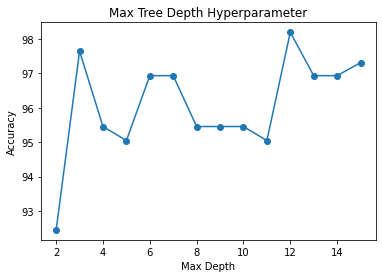

_________________________________________________________________________
Hyperparameter max_depth to use is 12 as the accuracy is the highest 98.1970132575978
_________________________________________________________________________

################################################
Last Experiment to get final accuracy of trained model
################################################

Decision Tree result
Accuracy:  99.08628496269482
_________________________________________________________________________
In conclusion the model with criterion, gini, and hyperparameter max_depth of 12 gives the best accuracy, 99.08628496269482
_________________________________________________________________________







++++++++++++++
Experiment 2
++++++++++++++

################################################
Decide to use Gini or Entropy for the criterion
################################################

Decision Tree with Gini result
Accuracy:  31.2015503875969

Decision Tree with Entropy resu

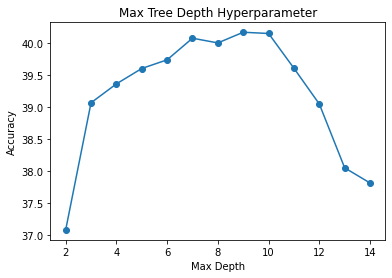

_________________________________________________________________________
Hyperparameter max_depth to use is 9 as the accuracy is the highest 40.166666666666664
_________________________________________________________________________

################################################
Last Experiment to get final accuracy of trained model
################################################

Decision Tree result
Accuracy:  40.27519379844961
_________________________________________________________________________
In conclusion the model with criterion, gini, and hyperparameter max_depth of 9 gives the best accuracy, 40.27519379844961
_________________________________________________________________________



In [314]:
from sklearn import tree
import os
from google.colab import files
import graphviz
def main(data_, test_size, imagename):

  # Clean Data and stuff bla bla
  data = data_

  # Hyperparameter selection
  print("################################################")
  print("Decide to use Gini or Entropy for the criterion")
  print("################################################\n")
  
  # Train
  X, Y, X_train, X_test, y_train, y_test = split_data(data,test_size)

  decisionTree_Gini = DecisionTree(X_train, y_train, 'gini', None)
  decisionTree_Entropy = DecisionTree(X_train, y_train, 'entropy', None)

  # Predict
  print("Decision Tree with Gini result")
  y_output = predict(X_test, decisionTree_Gini)
  gini_accuracy = accuracy_model(y_test, y_output)

  print("\nDecision Tree with Entropy result")
  y_output = predict(X_test, decisionTree_Entropy)
  entropy_accuracy = accuracy_model(y_test, y_output)


  # Which criterion to use
  criterion = "gini" if gini_accuracy > entropy_accuracy else "entropy"
  print("_________________________________________________________________________")
  print(f"Therefore we will be using {criterion} as the accuracy is higher during testing")
  print("_________________________________________________________________________\n")


  print("################################################")
  print("Hyperparameter selection for Max Depth")
  print("################################################\n")
  accuracy_max_depth = []
  hyperparameter_values = []
  to_use = (0,0)

  # to make sure that the split is the same hence using the same dataset for testing different hyperparameters
  X, Y, X_train, X_test, y_train, y_test = split_data(data, test_size)

  for i in range(2,data.shape[1]):

    # Train
    decisionTree = DecisionTree(X_train, y_train, criterion, i)

    # Predict
    y_output = predict(X_test, decisionTree)
    accuracy = accuracy_model(y_test, y_output)

    # add the values to the variable to graph it later
    accuracy_max_depth.append(accuracy)
    hyperparameter_values.append(i)

    if accuracy > to_use[1]:
      to_use = (i,accuracy)
  
  # Graph the output to see which hyperparameter to use
  plt.plot(hyperparameter_values, accuracy_max_depth, marker = 'o')
  plt.title('Max Tree Depth Hyperparameter')
  plt.xlabel('Max Depth')
  plt.ylabel('Accuracy')
  plt.show()

  print("_________________________________________________________________________")
  print(f"Hyperparameter max_depth to use is {to_use[0]} as the accuracy is the highest {to_use[1]}")
  print("_________________________________________________________________________\n")


  # One last experiment with all the hyperparameters chosen
  print("################################################")
  print('Last Experiment to get final accuracy of trained model')
  print("################################################\n")

  X, Y, X_train, X_test, y_train, y_test = split_data(data, test_size)
  # Train
  decisionTree = DecisionTree(X_train, y_train, criterion, to_use[0])


  # Predict
  print("Decision Tree result")
  y_output = predict(X_test, decisionTree)
  accuracy = accuracy_model(y_test, y_output)

  print("_________________________________________________________________________")
  print(f"In conclusion the model with criterion, {criterion}, and hyperparameter max_depth of {to_use[0]} gives the best accuracy, {accuracy}")
  print("_________________________________________________________________________\n")

  #########################
  # Decision Tree Graph Representation that gets automatically downloaded
  #########################

  dot_data = tree.export_graphviz(decisionTree, out_file=None) 
  graph = graphviz.Source(dot_data) 
  graph.render(imagename) 

  dot_data = tree.export_graphviz(decisionTree, out_file=None, 
                     feature_names=data.columns[:-1],  
                     class_names=data.grade,  
                     filled=True, rounded=True,  
                     special_characters=True)  
  graph = graphviz.Source(dot_data)  
  graph 


# Experiment 1 
print("++++++++++++++")
print("Experiment 1")
print("++++++++++++++\n")
main(rel_data, 0.999, "Experiment_1")

print('\n\n\n\n\n')

# Experiment 2
print("++++++++++++++")
print("Experiment 2")
print("++++++++++++++\n")
main(rel_data_exclude_int, 0.3, "Experiment_2")